In [1]:
#Import neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lazypredict
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_precision_recall_curve

In [2]:
df = pd.read_csv("Dataset/web_attacks_balanced.csv")

In [3]:
excluded = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol']
df = df.drop(columns=excluded, errors='ignore')

In [6]:
df.columns.value_counts().sum()

77

In [8]:
webattack_features_20 = ['Average Packet Size',
 'Bwd Packet Length Std',
 'Avg Bwd Segment Size',
 'Bwd Packet Length Mean',
 'Total Length of Fwd Packets',
 'Fwd Packet Length Mean',
 'Packet Length Variance',
 'Bwd Packet Length Max',
 'Packet Length Mean',
 'Min Packet Length',
 'Fwd Packet Length Max',
 'Subflow Fwd Bytes',
 'Subflow Bwd Bytes',
 'Total Length of Bwd Packets',
 'Bwd Header Length',
 'Avg Fwd Segment Size',
 'Packet Length Std',
 'Fwd Packet Length Min',
 'Bwd Packet Length Min',
 'Max Packet Length']

In [9]:
webattack_features_10 = ['Average Packet Size',
 'Bwd Packet Length Std',
 'Avg Bwd Segment Size',
 'Bwd Packet Length Mean',
 'Total Length of Fwd Packets',
 'Fwd Packet Length Mean',
 'Packet Length Variance',
 'Bwd Packet Length Max',
 'Min Packet Length',
 'Fwd Packet Length Max']

In [10]:
df_pos = df[df["Label"]== 1]
df_neg = df[df["Label"]== 0]

df_sample = pd.concat([df_pos.head(2000), df_neg.head(2000)])
df_sample["Label"].value_counts()

1    2000
0    2000
Name: Label, dtype: int64

In [12]:
y = df_sample['Label'].values
X = df_sample[webattack_features_10]
print(X.shape, y.shape)

(4000, 10) (4000,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2800, 10) (2800,)
(1200, 10) (1200,)


In [14]:
#import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric = None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


In [13]:
models["A/time"] = models["Accuracy"] / models["Time Taken"]

In [15]:
models.to_csv("models_perf.csv")

# MODEL TRAINING

## Pre-Analysis

In [16]:
y = df['Label'].values
X = df[webattack_features_10]  #Using the top 10 features
X_20 = df[webattack_features_20] # Using the top 20 features
print(X.shape, X_20.shape, y.shape)

(1204915, 10) (1204915, 20) (1204915,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(843440, 10) (843440,)
(361475, 10) (361475,)


In [23]:
X_train_20, X_test_20, y_train, y_test = train_test_split(X_20, y, test_size=0.3, random_state=42)
print(X_train_20.shape, y_train.shape)
print(X_test_20.shape, y_test.shape)

(843440, 20) (843440,)
(361475, 20) (361475,)


In [18]:
classifier_accuracy = {"classifier":[], "accuracy":[], "pre_recall_f1_score":[],"time_taken":[]}

### DECISION TREE CLASSIFIER

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [20]:
clf = DecisionTreeClassifier(max_depth=8)

In [21]:
#Predict the response for test dataset

from time import time
t0 = time()
clf.fit(X_train, y_train)
time_taken = time() - t0
print(time_taken)

y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("Decision Tree")
classifier_accuracy["time_taken"].append(time_taken)

2.2477633953094482
Accuracy:  0.9496562694515527


In [22]:
classifier_accuracy

{'classifier': ['Decision Tree'],
 'accuracy': [0.9496562694515527],
 'pre_recall_f1_score': [(0.9491707215855704,
   0.9540701832932811,
   0.949490520523974,
   None)],
 'time_taken': [2.2477633953094482]}

In [19]:
print(metrics.classification_report(y_test ,y_pred))
print(metrics.confusion_matrix(y_test ,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    199601
           1       0.90      1.00      0.95    161874

    accuracy                           0.95    361475
   macro avg       0.95      0.95      0.95    361475
weighted avg       0.95      0.95      0.95    361475

[[181993  17608]
 [   587 161287]]


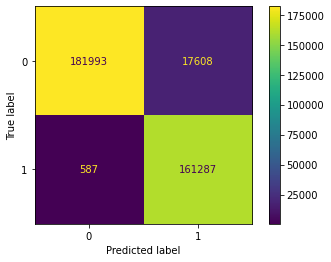

In [22]:
plot = plot_confusion_matrix(clf, X_test, y_test)
plt.savefig("imgs/decision_tree.png")

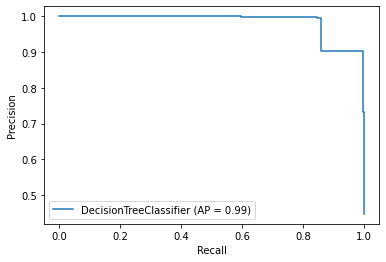

In [23]:
plot_precision_recall_curve(clf, X_test, y_test)
plt.savefig("imgs/decision_tree_roc.png")

## DECISION TREE WITH 20 FEATURES

In [24]:
#Predict the response for test dataset

from time import time
t0 = time()
clf.fit(X_train_20, y_train)
time_taken = time() - t0
print(time_taken)

y_pred = clf.predict(X_test_20)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("Decision Tree_20")
classifier_accuracy["time_taken"].append(time_taken)

4.567030668258667
Accuracy:  0.9815063282384674


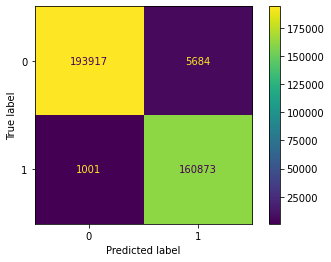

In [26]:
plot = plot_confusion_matrix(clf, X_test_20, y_test)
plt.savefig("imgs/decision_tree_20.png")

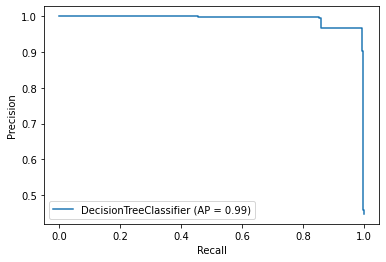

In [27]:
plot_precision_recall_curve(clf, X_test_20, y_test)
plt.savefig("imgs/decision_tree_roc_20.png")

In [25]:
classifier_accuracy

{'classifier': ['Decision Tree', 'Decision Tree_20'],
 'accuracy': [0.9496562694515527, 0.9815063282384674],
 'pre_recall_f1_score': [(0.9491707215855704,
   0.9540701832932811,
   0.949490520523974,
   None),
  (0.9803690259592734, 0.9826696833882893, 0.9813504820066825, None)],
 'time_taken': [2.2477633953094482, 4.567030668258667]}

### XGB CLASSIFIER

In [35]:
from xgboost import XGBClassifier
clf = XGBClassifier()

In [36]:
#Predict the response for test dataset

from time import time
t0 = time()
clf.fit(X_train, y_train)
time_taken = time() - t0
print(time_taken)
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("XG_Boost")
classifier_accuracy["time_taken"].append(time_taken)

29.649704456329346
Accuracy:  0.951238674873781


In [37]:
print(metrics.classification_report(y_test ,y_pred))
print(metrics.confusion_matrix(y_test ,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    199601
           1       0.90      1.00      0.95    161874

    accuracy                           0.95    361475
   macro avg       0.95      0.96      0.95    361475
weighted avg       0.96      0.95      0.95    361475

[[182170  17431]
 [   195 161679]]


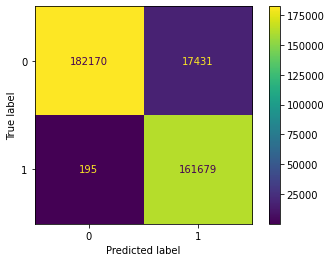

In [38]:
plot = plot_confusion_matrix(clf, X_test, y_test)
plt.savefig("imgs/xgboost.png")

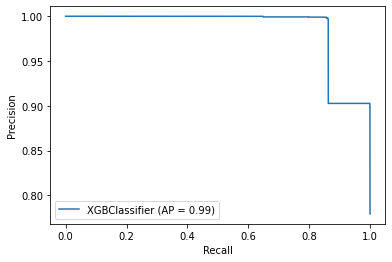

In [39]:
plot_precision_recall_curve(clf, X_test, y_test)
plt.savefig("imgs/xgboost_roc.png")

## XG-BOOST WITH 20 FEATURES

In [40]:
#Predict the response for test dataset

from time import time
t0 = time()
clf.fit(X_train_20, y_train)
time_taken = time() - t0
print(time_taken)
y_pred = clf.predict(X_test_20)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("XG_Boost_20")
classifier_accuracy["time_taken"].append(time_taken)

52.12495803833008
Accuracy:  0.9830002074832285


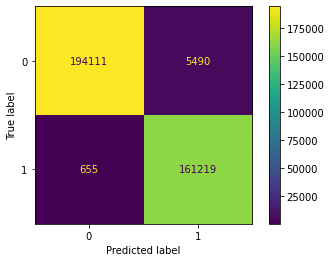

In [41]:
plot = plot_confusion_matrix(clf, X_test_20, y_test)
plt.savefig("imgs/xgboost_20.png")

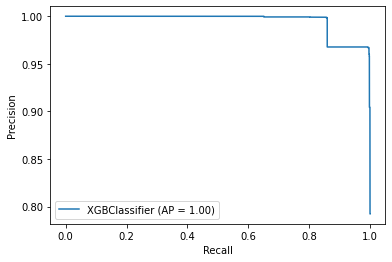

In [42]:
plot_precision_recall_curve(clf, X_test_20, y_test)
plt.savefig("imgs/xgboost_roc_20.png")

### QDA CLASSIFIER

In [43]:
from sklearn import discriminant_analysis
clf = discriminant_analysis.QuadraticDiscriminantAnalysis()

In [44]:
#Predict the response for test dataset

from time import time
t0 = time()
clf.fit(X_train, y_train)
time_taken = time() - t0
print(time_taken)
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("QDA")
classifier_accuracy["time_taken"].append(time_taken)

0.5893583297729492
Accuracy:  0.7302856352444844


In [45]:
print(metrics.classification_report(y_test ,y_pred))
print(metrics.confusion_matrix(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.52      0.68    199601
           1       0.63      0.99      0.77    161874

    accuracy                           0.73    361475
   macro avg       0.81      0.76      0.72    361475
weighted avg       0.83      0.73      0.72    361475

[[103311  96290]
 [  1205 160669]]


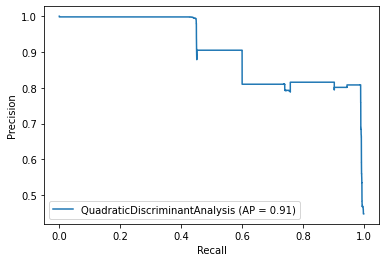

In [46]:
plot_precision_recall_curve(clf, X_test, y_test)
plt.savefig("imgs/QDA_classifier_roc.png")

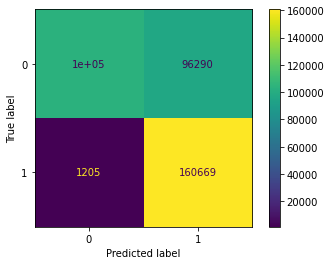

In [47]:
plot = plot_confusion_matrix(clf, X_test, y_test)
plt.savefig("imgs/QDA_classifier.png")

In [48]:
#Predict the response for test dataset

from time import time
t0 = time()
clf.fit(X_train_20, y_train)
time_taken = time() - t0
print(time_taken)
y_pred = clf.predict(X_test_20)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("QDA_20")
classifier_accuracy["time_taken"].append(time_taken)

1.5486018657684326
Accuracy:  0.6391811328584273


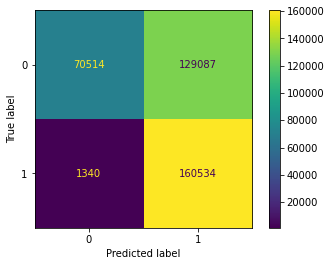

In [49]:
plot = plot_confusion_matrix(clf, X_test_20, y_test)
plt.savefig("imgs/QDA_classifier_20.png")

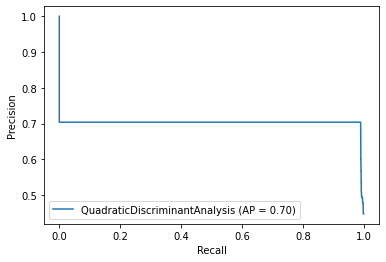

In [50]:
plot_precision_recall_curve(clf, X_test_20, y_test)
plt.savefig("imgs/xgboost_roc_20.png")

In [51]:
classifier_accuracy

{'classifier': ['Decision Tree',
  'Decision Tree_20',
  'XG_Boost',
  'XG_Boost_20',
  'QDA',
  'QDA_20'],
 'accuracy': [0.9496562694515527,
  0.9815063282384674,
  0.951238674873781,
  0.9830002074832285,
  0.7302856352444844,
  0.6391811328584273],
 'pre_recall_f1_score': [(0.9491707215855704,
   0.9540701832932811,
   0.949490520523974,
   None),
  (0.9803690259592734, 0.9826696833882893, 0.9813504820066825, None),
  (0.9508053166206147, 0.9557330687780426, 0.9510814782919526, None),
  (0.9818526773322216, 0.9842243853683943, 0.9828582760700936, None),
  (0.806870811201094, 0.7550717629030208, 0.7233192018978551, None),
  (0.7678204949157437, 0.6724983698879923, 0.6153240979944168, None)],
 'time_taken': [2.2477633953094482,
  4.567030668258667,
  29.649704456329346,
  52.12495803833008,
  0.5893583297729492,
  1.5486018657684326]}

### KNN CLASSIFIER

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [53]:
#Predict the response for test dataset

clf = KNeighborsClassifier(3)
from time import time
t0 = time()
clf.fit(X_train, y_train)
time_taken = time() - t0
print(time_taken)
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("KNN")
classifier_accuracy["time_taken"].append(time_taken)

75.56989049911499
Accuracy:  0.9365267307559305


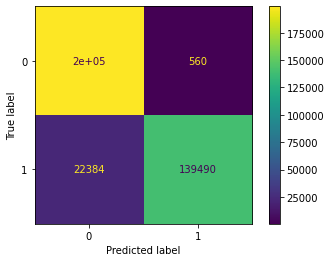

In [54]:
plot = plot_confusion_matrix(clf, X_test, y_test)
plt.savefig("imgs/KNN_CLASSIFIER.png")

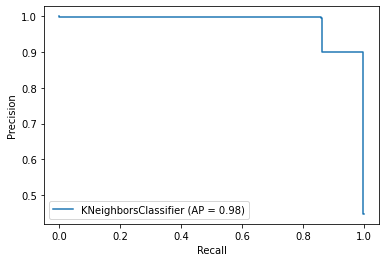

In [55]:
plot_precision_recall_curve(clf, X_test, y_test)
plt.savefig("imgs/KNN_Classifierroc.png")

## KNN With 20 Features

74.61275672912598
Accuracy:  0.9823722249118196
1344.5601425170898


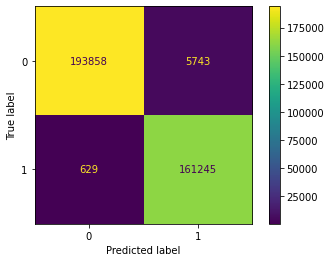

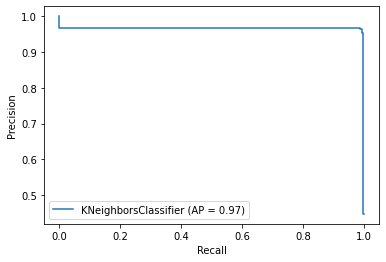

In [56]:
#Predict the response for test dataset

clf = KNeighborsClassifier(3)
from time import time
t0 = time()
clf.fit(X_train_20, y_train)
time_taken = time() - t0
print(time_taken)
y_pred = clf.predict(X_test_20)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("KNN_20")
classifier_accuracy["time_taken"].append(time_taken)
plot = plot_confusion_matrix(clf, X_test_20, y_test)
plt.savefig("imgs/KNN_CLASSIFIER_20.png")
plot_precision_recall_curve(clf, X_test_20, y_test)
plt.savefig("imgs/KNN_Classifierroc_20.png")
time_taken = time() - t0
print(time_taken)

## SVM

In [57]:
clf = SVC(kernel="linear", C=0.025)
from time import time
t0 = time()
clf.fit(X_train, y_train)
time_taken = time() - t0
print(time_taken)
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("SVM")
classifier_accuracy["time_taken"].append(time_taken)

plot = plot_confusion_matrix(clf, X_test, y_test)
plt.savefig("imgs/SVM.png")
plot_precision_recall_curve(clf, X_test, y_test)
plt.savefig("imgs/SVM_roc.png")

## SVM With 20 Features

In [ ]:
clf = SVC(kernel="linear", C=0.025)
from time import time
t0 = time()
clf.fit(X_train_20, y_train)
time_taken = time() - t0
print(time_taken)
y_pred = clf.predict(X_test_20)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("SVM-20")
classifier_accuracy["time_taken"].append(time_taken)

plot = plot_confusion_matrix(clf, X_test_20, y_test)
plt.savefig("imgs/SVM_20.png")
plot_precision_recall_curve(clf, X_test_20, y_test)
plt.savefig("imgs/SVM_roc_20.png")

## Random Forest

In [ ]:
clf =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

from time import time
t0 = time()
clf.fit(X_train, y_train)
time_taken = time() - t0
print(time_taken)
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("RF")
classifier_accuracy["time_taken"].append(time_taken)

plot = plot_confusion_matrix(clf, X_test, y_test)
plt.savefig("imgs/RF.png")
plot_precision_recall_curve(clf, X_test, y_test)
plt.savefig("imgs/RF_roc.png")

## RF with 20 Features

In [ ]:
from time import time
t0 = time()
clf.fit(X_train_20, y_train)
time_taken = time() - t0
print(time_taken)
y_pred = clf.predict(X_test_20)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("RF-20")
classifier_accuracy["time_taken"].append(time_taken)

plot = plot_confusion_matrix(clf, X_test_20, y_test)
plt.savefig("imgs/RF_20.png")
plot_precision_recall_curve(clf, X_test_20, y_test)
plt.savefig("imgs/RF_roc_20.png")

## MLP

In [ ]:
clf  = MLPClassifier(alpha=1, max_iter=1000)

from time import time
t0 = time()
clf.fit(X_train, y_train)
time_taken = time() - t0
print(time_taken)
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("MLP")
classifier_accuracy["time_taken"].append(time_taken)

plot = plot_confusion_matrix(clf, X_test, y_test)
plt.savefig("imgs/MLP.png")
plot_precision_recall_curve(clf, X_test, y_test)
plt.savefig("imgs/MLP_roc.png")


## MLP with 20 Features

In [ ]:
from time import time
t0 = time()
clf.fit(X_train_20, y_train)
time_taken = time() - t0
print(time_taken)
y_pred = clf.predict(X_test_20)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


classifier_accuracy["accuracy"].append(metrics.accuracy_score(y_test, y_pred))
classifier_accuracy["pre_recall_f1_score"].append(metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))
classifier_accuracy["classifier"].append("MLP-20")
classifier_accuracy["time_taken"].append(time_taken)

plot = plot_confusion_matrix(clf, X_test_20, y_test)
plt.savefig("imgs/MLP_20.png")
plot_precision_recall_curve(clf, X_test_20, y_test)
plt.savefig("imgs/MLP_roc_20.png")